# Analyzing Vector metric on State of the Art Models


#### Imports

In [5]:
import sys
import pandas as pd
sys.path.append("..")
import seaborn as sns
import nltk
import matplotlib.pyplot as plt

from humor.vector_similarity_metric import vector_similarity_metric

In [6]:
ground_truth = pd.read_csv('/home/ada/humor/data/stand_up_dataset/standup_data.csv')
gemma = pd.read_csv('/home/ada/humor/data/stand_up_dataset/gemma_answers.csv')
chatgpt = pd.read_csv("/home/ada/humor/data/stand_up_dataset/Chat_GPT_results - Sheet1.csv")
claude = pd.read_csv("/home/ada/humor/data/stand_up_dataset/Claude_results - Sheet1.csv")
gemma_llm = gemma.loc[gemma["comedian"].isin(["John_Mulaney", "Jimmy_Yang", "Russell_Peters", "Ali_Wong", "Hasan_Minhaj", "Chelsea_Peretti", "Trevor_Noah_2", "Joe_List", "Anthony_Jeselnik", "Sam_Morril_2"])]
llm_gt = ground_truth.loc[ground_truth["comedian"].isin(["John_Mulaney", "Jimmy_Yang", "Russell_Peters", "Ali_Wong", "Hasan_Minhaj", "Chelsea_Peretti", "Trevor_Noah_2", "Joe_List", "Anthony_Jeselnik", "Sam_Morril_2"])]

Experiment

In [7]:
gemma_llm_metric = vector_similarity_metric(gemma_llm, llm_gt)
print("Gemma: ", gemma_llm_metric.select_dtypes(include='number').mean())

chatgpt_metric = vector_similarity_metric(chatgpt, llm_gt)
print("ChatGPT:", chatgpt_metric.select_dtypes(include='number').mean())

claude_metric = vector_similarity_metric(claude, llm_gt)
print("Claude:", claude_metric.select_dtypes(include='number').mean())

Gemma:  score    27.72568
dtype: float64
ChatGPT: score    58.549092
dtype: float64
Claude: score    58.384588
dtype: float64


<Figure size 500x500 with 0 Axes>

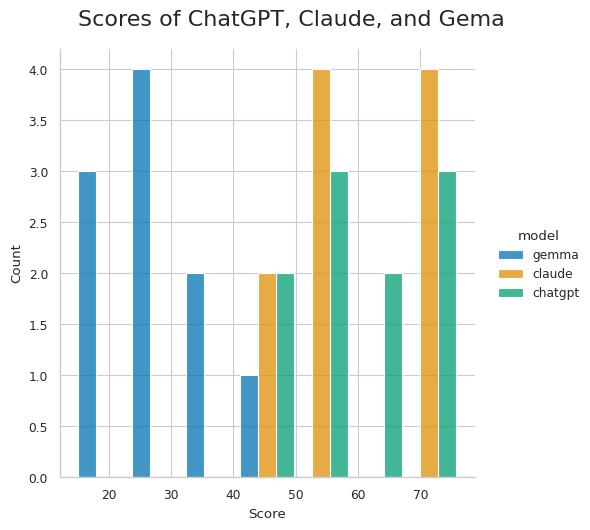

In [8]:
gemma = gemma_llm_metric.assign(model = "gemma")
claude = claude_metric.assign(model="claude") 
chatgpt = chatgpt_metric.assign(model="chatgpt")
df = pd.concat([gemma, claude, chatgpt]).reset_index(drop=True)
sns.set_style("whitegrid")
sns.set_context("paper")
plt.figure(figsize=(5, 5))  
sns.set_palette("colorblind")
plot = sns.displot(df, x="score", hue="model", kind="hist", shrink=1, multiple="dodge", bins=7)

plot.fig.suptitle("Scores of ChatGPT, Claude, and Gema", fontsize=16, y=1.05)  
plot.set_axis_labels("Score", "Count")  
plot.savefig("experiment_03.png", dpi=300)
plt.show()